# Расчётно-графическая работа №1

**Вариант 2**

## Задание 1

В файле [sex_bmi_smokers.csv](./sex_bmi_smokers.csv) приведены данные (пол, ИМТ, курит/не курит) о более 1000 испытуемых. Сравните количество курящих мужчин и некурящих женщин. Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и выборочную квантиль порядка 3/5 ИМТ всех наблюдателей и отдельно для каждой возможной комбинации пол-курение. Построить график эмпирической функции распределения, гистограмму и box-plot ИМТ для всех наблюдателей и отдельно для каждой возможной комбинации пол-курение.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
df = pd.read_csv("sex_bmi_smokers.csv")

num_male_smokers = len(df[(df["sex"] == "male") & (df["smoker"] == "yes")])
num_female_nonsmokers = len(df[(df["sex"] == "female") & (df["smoker"] == "no")])

def mean(data):
    """Вычисляет выборочное среднее списка чисел."""
    return sum(data) / len(data)

def variance(data):
    """Вычисляет выборочную дисперсию списка чисел."""
    m = mean(data)
    return sum((x - m) ** 2 for x in data) / (len(data) - 1)

def median(data):
    """Вычисляет медиану списка чисел."""
    data = sorted(data)
    n = len(data)
    if n % 2 == 1:
        return data[n // 2]
    return (data[n // 2 - 1] + data[n // 2]) / 2

def quantile(data, q):
    """Вычисляет квантиль порядка q списка чисел."""
    data = sorted(data)
    index = int(q * (len(data) - 1))
    return data[index]

bmi_all = df["bmi"].tolist()
mean_all = mean(bmi_all)
variance_all = variance(bmi_all)
median_all = median(bmi_all)
quantile_3_5_all = quantile(bmi_all, 3/5)

stats_by_group = {}
for (sex, smoker), group in df.groupby(["sex", "smoker"]):
    bmi_group = group["bmi"].tolist()
    stats_by_group[(sex, smoker)] = {
        "mean": mean(bmi_group),
        "variance": variance(bmi_group),
        "median": median(bmi_group),
        "quantile_3_5": quantile(bmi_group, 3/5)
    }


print("Курящих мужчин:", num_male_smokers)
print("Некурящих женщин:", num_female_nonsmokers)
print("\nСтатистика для всех наблюдений:")
print("Среднее:", mean_all)
print("Дисперсия:", variance_all)
print("Медиана:", median_all)
print("Квантиль 3/5:", quantile_3_5_all)

print("\nСтатистика по группам:")
for group, stats in stats_by_group.items():
    print(group, stats)

Курящих мужчин: 159
Некурящих женщин: 547

Статистика для всех наблюдений:
Среднее: 30.663396860986538
Дисперсия: 37.187883609773266
Медиана: 30.4
Квантиль 3/5: 32.015

Статистика по группам:
('female', 'no') {'mean': 30.539524680073132, 'variance': 34.831014517246935, 'median': 30.21, 'quantile_3_5': 31.9}
('female', 'yes') {'mean': 29.608260869565225, 'variance': 44.406251334858894, 'median': 28.38, 'quantile_3_5': 30.78}
('male', 'no') {'mean': 30.77058027079302, 'variance': 38.34880053472626, 'median': 30.495, 'quantile_3_5': 32.11}
('male', 'yes') {'mean': 31.504182389937107, 'variance': 35.426637618422085, 'median': 31.13, 'quantile_3_5': 32.9}


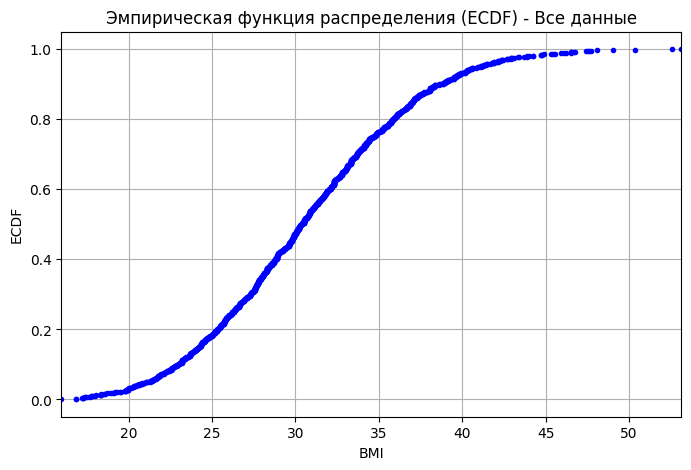

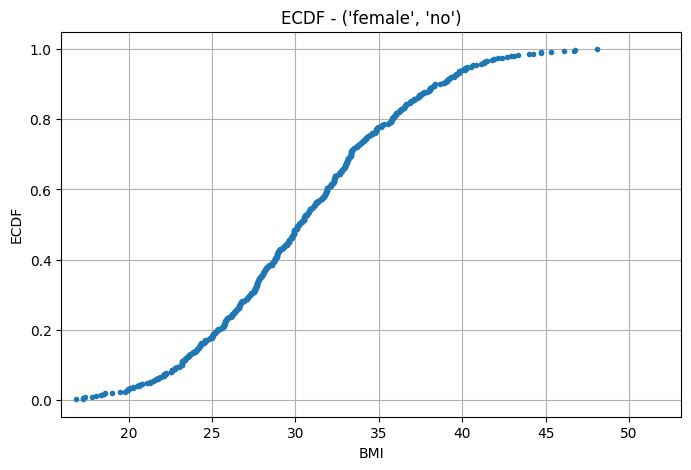

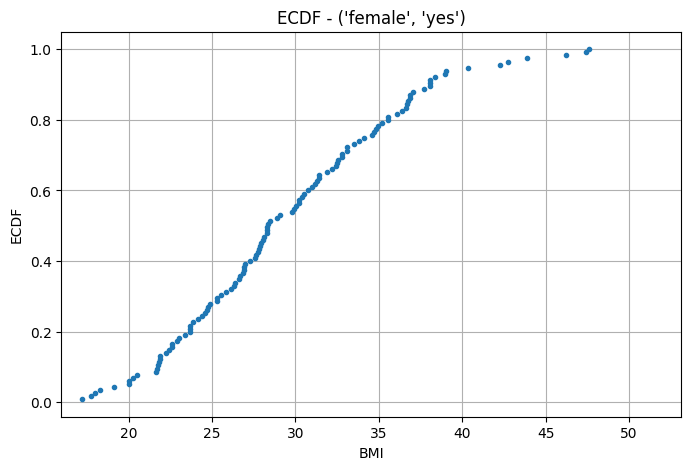

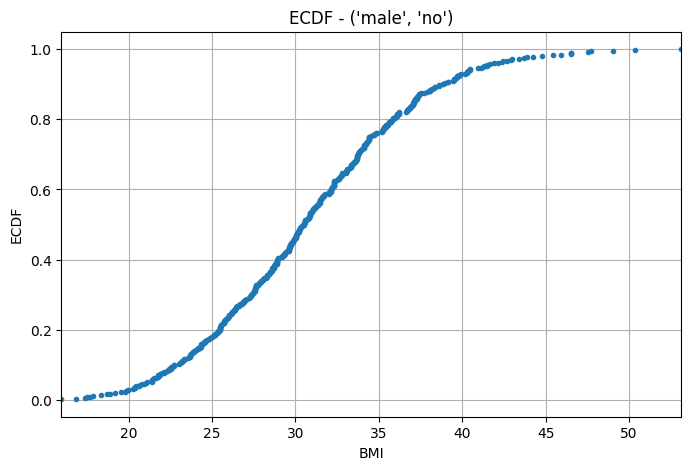

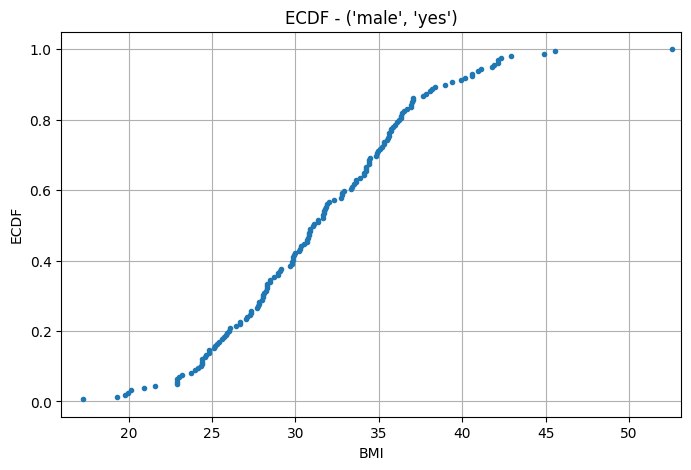

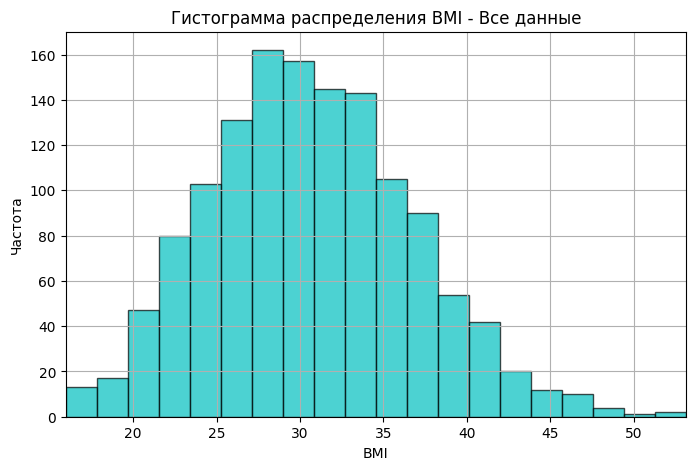

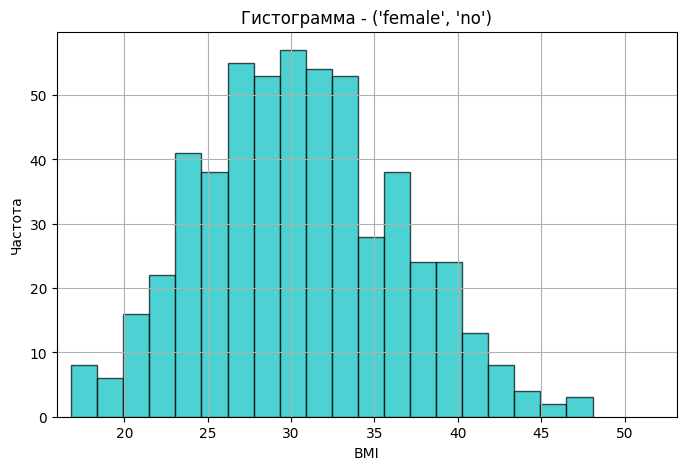

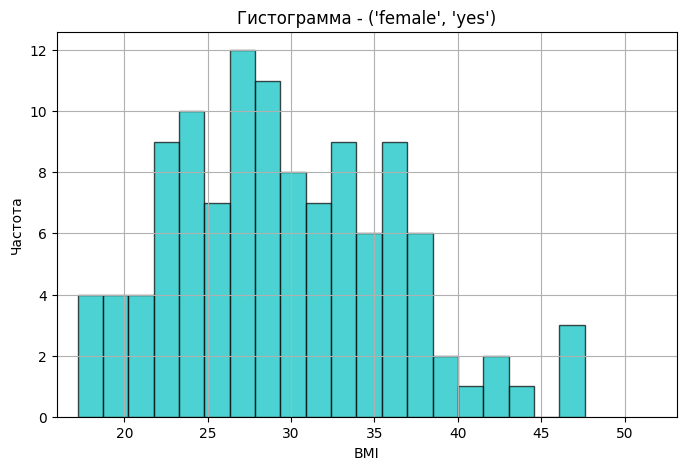

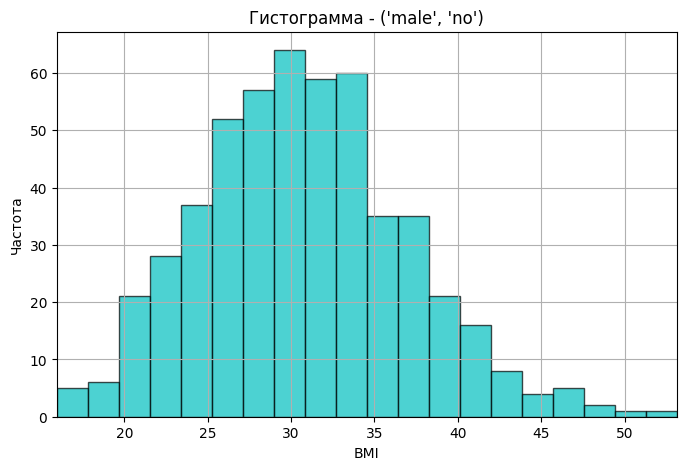

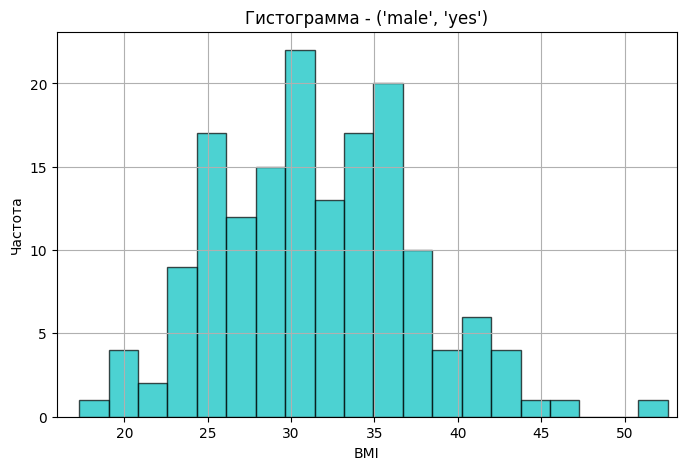

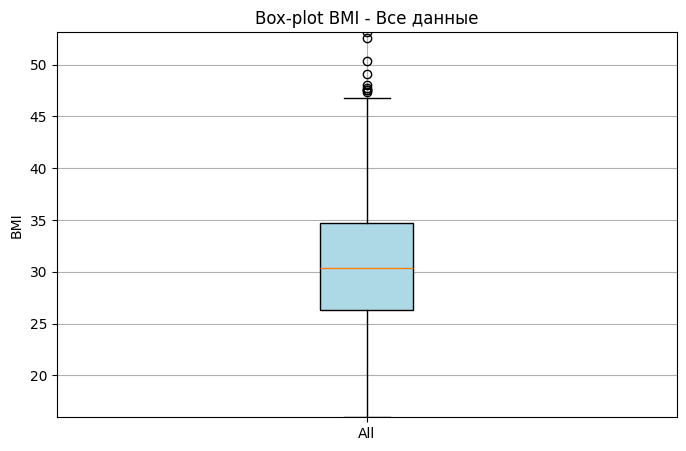

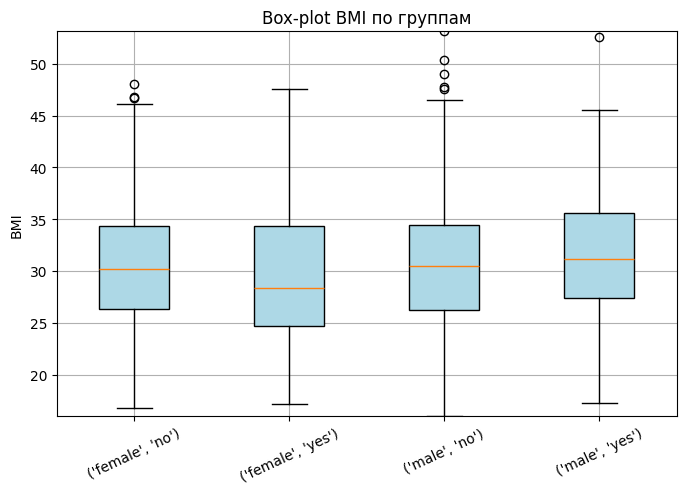

In [ ]:
# Функция ECDF (эмпирическая функция распределения)
def ecdf(data):
    data = sorted(data)
    n = len(data)
    x = data
    y = [(i + 1) / n for i in range(n)]
    return x, y

# Функция вычисления пяти чисел статистики (мин, Q1, медиана, Q3, макс)
def five_number_summary(data):
    data = sorted(data)
    n = len(data)

    def quantile(q):
        index = int(q * (n - 1))
        return data[index]

    return data[0], quantile(0.25), quantile(0.5), quantile(0.75), data[-1]

# Читаем CSV-файл
bmi_data = []
grouped_data = {('female', 'no'): [], ('female', 'yes'): [], ('male', 'no'): [], ('male', 'yes'): []}

with open("sex_bmi_smokers.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        bmi = float(row['bmi'])
        bmi_data.append(bmi)
        grouped_data[(row['sex'], row['smoker'])].append(bmi)

# Определяем границы оси BMI
bmi_min = min(bmi_data)
bmi_max = max(bmi_data)

# 1. ECDF для всех данных
plt.figure(figsize=(8, 5))
x, y = ecdf(bmi_data)
plt.plot(x, y, marker='o', linestyle='none', markersize=3, color='b')
plt.xlabel("BMI")
plt.ylabel("ECDF")
plt.title("Эмпирическая функция распределения (ECDF) - Все данные")
plt.grid()
plt.xlim(bmi_min, bmi_max)  # Одинаковый масштаб
plt.show()

# ECDF для каждой группы
for group, data in grouped_data.items():
    plt.figure(figsize=(8, 5))
    x, y = ecdf(data)
    plt.plot(x, y, marker='o', linestyle='none', markersize=3)
    plt.xlabel("BMI")
    plt.ylabel("ECDF")
    plt.title(f"ECDF - {group}")
    plt.grid()
    plt.xlim(bmi_min, bmi_max)  # Одинаковый масштаб
    plt.show()

# 2. Гистограмма для всех данных
plt.figure(figsize=(8, 5))
plt.hist(bmi_data, bins=20, color='c', edgecolor='black', alpha=0.7)
plt.xlabel("BMI")
plt.ylabel("Частота")
plt.title("Гистограмма распределения BMI - Все данные")
plt.grid()
plt.xlim(bmi_min, bmi_max)  # Одинаковый масштаб
plt.show()

# Гистограммы для каждой группы
for group, data in grouped_data.items():
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=20, color='c', edgecolor='black', alpha=0.7)
    plt.xlabel("BMI")
    plt.ylabel("Частота")
    plt.title(f"Гистограмма - {group}")
    plt.grid()
    plt.xlim(bmi_min, bmi_max)  # Одинаковый масштаб
    plt.show()

# 3. Box-plot для всех данных
plt.figure(figsize=(8, 5))
plt.boxplot(bmi_data, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xticks([1], ["All"])
plt.ylabel("BMI")
plt.title("Box-plot BMI - Все данные")
plt.grid()
plt.ylim(bmi_min, bmi_max)  # Одинаковый масштаб
plt.show()

# Box-plot для каждой группы
plt.figure(figsize=(8, 5))
positions = range(1, len(grouped_data) + 1)
labels = [str(k) for k in grouped_data.keys()]
box_data = [grouped_data[key] for key in grouped_data]

plt.boxplot(box_data, positions=positions, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xticks(positions, labels, rotation=25)
plt.ylabel("BMI")
plt.title("Box-plot BMI по группам")
plt.grid()
plt.ylim(bmi_min, bmi_max)  # Одинаковый масштаб
plt.show()

## Задание 2

Предположите, какому вероятностному закону соответствует распределение показателя, рассмотренного (расчет выборочных характеристик и визуализация) в задании №1. Оцените параметры данного распределения методом максимального правдоподобия или методом моментов (**математическое обоснование оценки строго обязательно**). Какими статистическими свойствами обладает найденная оценка (**обосновать**)? Найти **теоретические** смещение, дисперсию, MSE (или хотя бы написать теоретические формулы, по которым данные показатели вычиляются, если в итоге получается "очень сложный" интеграл/ряд), информацию Фишера (если определена для вашей модели).

### 1. Предположение о распределении ИМТ
Предполагаем, что ИМТ имеет **нормальное распределение** с параметрами $\mu$ (среднее) и $\sigma^2$ (дисперсия). Для проверки нормальности можно использовать:
- **Q-Q plot** для визуального анализа.
- **Тест Шапиро-Уилка** для формальной проверки гипотезы о нормальности.

---

### 2. Плотность и функция распределения
Плотность нормального распределения:  
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
Функция распределения:  
$$
F(x) = \frac{1}{2} \left[1 + \text{erf}\left(\frac{x-\mu}{\sigma \sqrt{2}}\right)\right],
$$
где $\text{erf}$ — функция ошибок.

---

### 3. Оценка параметров методом максимального правдоподобия (ММП)
Для нормального распределения оценки ММП совпадают с методом моментов:
- **Оценка среднего**:  
  $$
  \hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i = 30.66 \, \text{кг/м}^2
  $$
- **Оценка дисперсии**:  
  $$
  \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2 = 37.19 \, (\text{кг/м}^2)^2
  $$

---

### 4. Статистические свойства оценок
1. **Среднее ($\hat{\mu}$)**:
   - **Несмещенность**: $\mathbb{E}[\hat{\mu}] = \mu$.
   - **Состоятельность**: $\hat{\mu} \xrightarrow{n \to \infty} \mu$.
   - **Дисперсия**: $\text{Var}(\hat{\mu}) = \frac{\sigma^2}{n}$.
   - **Эффективность**: Достигает нижней границы Крамера-Рао.

2. **Дисперсия ($\hat{\sigma}^2$)**:
   - **Смещение**: $\mathbb{E}[\hat{\sigma}^2] = \sigma^2 \cdot \frac{n-1}{n}$ → смещение $-\frac{\sigma^2}{n}$.
   - **Состоятельность**: $\hat{\sigma}^2 \xrightarrow{n \to \infty} \sigma^2$.
   - **Дисперсия оценки**: $\text{Var}(\hat{\sigma}^2) = \frac{2\sigma^4}{n}$.
   - **MSE**:  
     $$
     \text{MSE}(\hat{\sigma}^2) = \text{Смещение}^2 + \text{Дисперсия} = \frac{\sigma^4}{n^2} + \frac{2\sigma^4}{n} \approx \frac{2\sigma^4}{n} \quad (\text{при больших } n).
     $$

---

### 5. Информация Фишера
Для нормального распределения матрица информации Фишера:  
$$
I(\mu, \sigma^2) = \begin{pmatrix}
\frac{1}{\sigma^2} & 0 \\
0 & \frac{1}{2\sigma^4}
\end{pmatrix}.
$$
Обратная матрица:  
$$
I^{-1}(\mu, \sigma^2) = \begin{pmatrix}
\sigma^2 & 0 \\
0 & 2\sigma^4
\end{pmatrix}.
$$  
Это задает нижние границы Крамера-Рао для дисперсий оценок:
- $\text{Var}(\hat{\mu}) \geq \sigma^2$,
- $\text{Var}(\hat{\sigma}^2) \geq 2\sigma^4$.

---

### 6. **Свойства оценок**
- **Смещение оценки $\hat{\sigma}^2$**:
  $$
  \text{Bias}(\hat{\sigma}^2) = -\frac{\sigma^2}{n} = -\frac{37.19}{1338} \approx -0.028 \, (\text{пренебрежимо мало}).
  $$
- **Дисперсия оценки $\hat{\sigma}^2$**:
  $$
  \text{Var}(\hat{\sigma}^2) = \frac{2\sigma^4}{n} = \frac{2 \cdot (37.19)^2}{1338} \approx 2.07.
  $$
- **MSE для $\hat{\sigma}^2$**:
  $$
  \text{MSE} = \text{Bias}^2 + \text{Var} = (-0.028)^2 + 2.07 \approx 2.07.
  $$


---

### Итог
- Распределение ИМТ аппроксимируется **нормальным законом**.
- Оценки $\hat{\mu}$ и $\hat{\sigma}^2$ найдены методом максимального правдоподобия.
- $\hat{\mu}$ — несмещенная, состоятельная и эффективная оценка.
- $\hat{\sigma}^2$ — смещенная, но состоятельная оценка. Для устранения смещения используют $\frac{n}{n-1} \hat{\sigma}^2$.
- Информация Фишера подтверждает асимптотическую эффективность оценок.

## Задание 3

Пусть $P_{\theta}$ — выбранное в предыдущем задании распределение, параметризующееся вектором $\theta$  
(например, равномерное распределение на $[-2\theta; 4\theta]$, $\hat{\theta} = \overline{X}$),  
где $\hat{\theta}$ — оценка параметра $\theta$, полученная в предыдущем упражнении.

Проведите численный эксперимент по следующей схеме:

- Зафиксируйте конкретное значение параметра $\theta = \theta_0$.
- Задайте массив $\{ n_1, \dots, n_k \}$ объёмов выборки.
- Сгенерируйте из распределения $P_{\theta_0}$ достаточно большое количество $M$ выборок объёма $n$,  
где $n$ принимает значения из массива $\{ n_1, \dots, n_k \}$.  
Для каждой сгенерированной выборки вычислите оценку $\hat{\theta}$.
- Эмпирически рассмотрите поведение оценки $\hat{\theta}$ в зависимости от объёма выборки $n$.  
Можно для каждого объёма выборки $n_i$ вывести описательные статистики для оценок,  
изобразить гистограмму, box-plot, violin-plot.

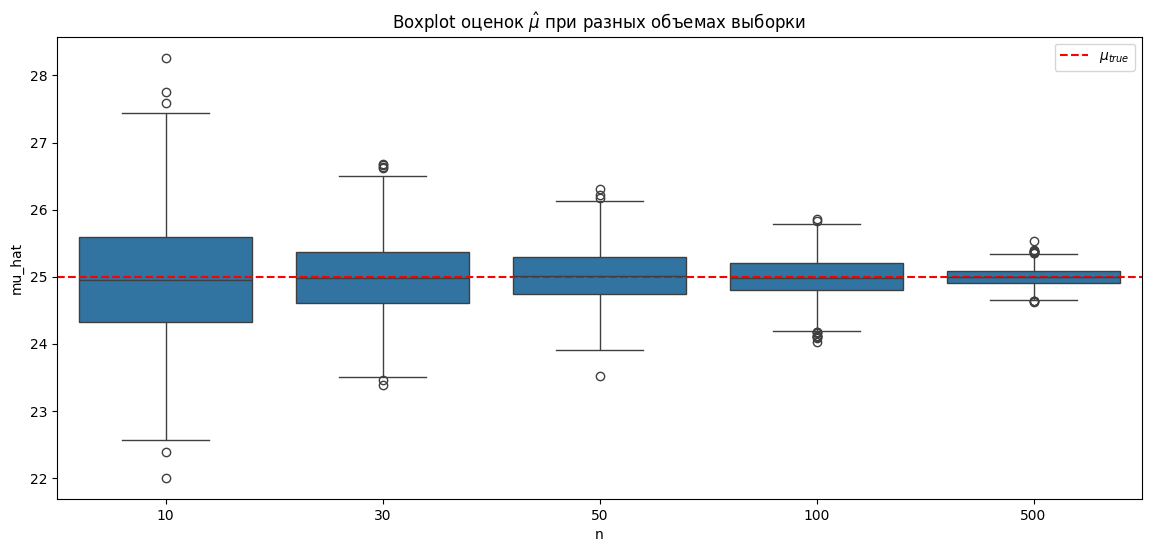

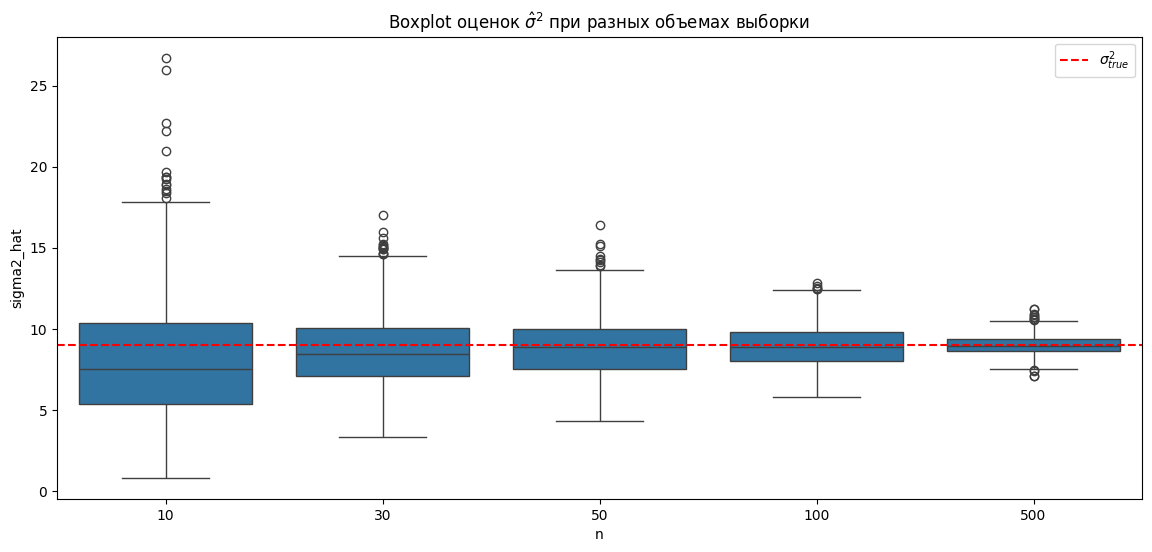

        mu_hat                     sigma2_hat                     
          mean       var       std       mean        var       std
n                                                                 
10   24.970616  0.910906  0.954414   8.100297  14.224561  3.771546
30   24.989529  0.320826  0.566415   8.644934   5.384432  2.320438
50   25.016063  0.174800  0.418091   8.868666   3.438860  1.854416
100  24.994208  0.095748  0.309432   8.958694   1.627536  1.275749
500  24.996359  0.018012  0.134210   9.006191   0.336402  0.580002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Параметры
mu_true = 25
sigma_true = 3
theta_0 = (mu_true, sigma_true)

sample_sizes = [10, 30, 50, 100, 500]
M = 1000

results = []

# Численный эксперимент
for n in sample_sizes:
    mu_estimates = []
    sigma2_estimates = []

    for _ in range(M):
        sample = np.random.normal(loc=mu_true, scale=sigma_true, size=n)

        # Оценка ММП для нормального распределения
        mu_hat = np.mean(sample)
        sigma2_hat = np.mean((sample - mu_hat) ** 2)  # Деление на n (смещенная)

        mu_estimates.append(mu_hat)
        sigma2_estimates.append(sigma2_hat)

    # Сохраняем результаты
    df = pd.DataFrame({
        'mu_hat': mu_estimates,
        'sigma2_hat': sigma2_estimates,
        'n': n
    })
    results.append(df)

# Объединяем результаты в один DataFrame
results_df = pd.concat(results, ignore_index=True)

# Визуализация оценок среднего
plt.figure(figsize=(14, 6))
sns.boxplot(data=results_df, x='n', y='mu_hat')
plt.axhline(mu_true, color='red', linestyle='--', label=r'$\mu_{true}$')
plt.title(r'Boxplot оценок $\hat{\mu}$ при разных объемах выборки')
plt.legend()
plt.show()

# Визуализация оценок дисперсии
plt.figure(figsize=(14, 6))
sns.boxplot(data=results_df, x='n', y='sigma2_hat')
plt.axhline(sigma_true ** 2, color='red', linestyle='--', label=r'$\sigma^2_{true}$')
plt.title(r'Boxplot оценок $\hat{\sigma}^2$ при разных объемах выборки')
plt.legend()
plt.show()

# Описательные статистики
desc_stats = results_df.groupby('n')[['mu_hat', 'sigma2_hat']].agg(['mean', 'var', 'std'])
print(desc_stats)

1. **Параметры распределения зафиксированы**:  
   $\mu = 25$, $\sigma^2 = 9$.

2. **Выбор объёмов выборки**:  
   $n = [10, 30, 50, 100, 500]$.

3. **Число симуляций**:  
   $M = 1000$.

4. **Результаты эксперимента показывают**:
   - При **малых** $n$ оценки $\hat{\mu}$ и $\hat{\sigma}^2$ **сильно варьируются** (распределение широкое, возможны смещения).
   - При **больших** $n$ оценки становятся **более точными** и **менее разбросанными**. Наблюдается **сходимость к истинным значениям параметров** — состоятельность оценок.

5. **Графики и описательные статистики подтверждают**:
   - **Асимптотическую несмещённость и эффективность** оценки среднего $\hat{\mu}$.
   - **Состоятельность** оценки дисперсии $\hat{\sigma}^2$.